## Project Risk Assessment

#### Author: Charlie Cao

In this Notebook, we are going to explore ways to apply Monte Carlo Simulations in predicting a project's completion date and assessing a project's risk. We encourage you to create your own Jupytor Notebook and follow along. You can also download this Notebook along with any accompanying data in the [Notebooks and Data](https://github.com/Master-of-Business-Analytics/Notebooks_and_Data) GitHub Repository. Alternatively, if you do not have Python or Jupyter Notebook installed yet, you may experiment with a virtual Notebook by launching Binder or Syzygy below (learn more about these two tools in the [Resource](https://analytics-at-sauder.github.io/resource.html) tab). 

<a href="https://ubc.syzygy.ca/jupyter/hub/user-redirect/git-pull?repo=https%3A%2F%2Fgithub.com%2FAnalytics-at-Sauder%2FProject_03_Project_Risk_Assessment&urlpath=tree%2FProject_03_Project_Risk_Assessment%2Fp03_project_risk_assessment.ipynb&branch=master" target="_blank" class="button">Launch Syzygy (UBC)</a>

<a href="https://pims.syzygy.ca/jupyter/hub/user-redirect/git-pull?repo=https%3A%2F%2Fgithub.com%2FAnalytics-at-Sauder%2FProject_03_Project_Risk_Assessment&urlpath=tree%2FProject_03_Project_Risk_Assessment%2Fp03_project_risk_assessment.ipynb&branch=master" target="_blank" class="button">Launch Syzygy (Google)</a>

<a href="https://mybinder.org/v2/gh/Analytics-at-Sauder/Project_03_Project_Risk_Assessment/master?filepath=p03_project_risk_assessment.ipynb" target="_blank" class="button">Launch Binder</a>

## Background

---

A Monte Carlo Simulation is a great tool for making business decisions under uncertainty, and it is well known in the Project Management domain. Rather than simply providing a predicted average project completion time, we can instead find a range of possible completion dates using a Monte Carlo Simulation. With a simple prediction of the average completion time, there is a chance as high as 50% that the deadline will be missed. On the other hand, to be conservative with a predicted completion time could likely lead us to lose the project bid to a different team with a lower estimate (whether that is a realistic one or not), because no one likes to hear pessimistic estimates. Monte Carlo Simulations, in this case, can give us an idea of the possible distribution of the project completion time, which would then allow us to quote and make decisions that incorporate uncertainty.

## Scenario One: Sequential Tasks

---

A construction project involves three tasks:

1. Task 1 is likely to take three days (70% probability), but it might also be completed in two days (with 10% probability) or four days (20% probability)
2. Task 2 has a 60% probability of taking six days to finish and a 20% probability each of being completed in five days or eight days
3. Task 3 has an 80% probability of being completed in four days, 5% probability of being completed in three days, and a 15% probability of being completed in five days.

![Sequential Tasks](images/p03_01.png)

Each task is dependent on the task before it, meaning that the three tasks must be executed in sequence. Your task is to provide information to the Project Manager concerning the expected completion time of the project and possible delays. Before we begin, install and import the following packages:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

One simple method is to calculate the expected completion date of each task and then sum up these average predictions for the three tasks, which would lead to the following:

\begin{equation}
\begin{split}
E\,[Project\:Completion\:Time] & = \sum_{n=1}^{3} E\,[Task_{n}\:Completion\:Time]\\
& = (0.7 \cdot 3 + 0.1 \cdot 2 + 0.2 \cdot 4) + (0.6 \cdot 6 + 0.2 \cdot 5 + 0.2 \cdot 8) + (0.8 \cdot 4 + 0.05 \cdot 3 + 0.15 \cdot 5)\\
& = 3.1 + 6.2 + 4\\
& = 13.3\:(days)
\end{split}
\end{equation}

However, without getting into too much detail, there is a fair chance that the actual completion time of the project is shorter or longer than 13.3 days, and it would be helpful to know the probability of different project completion times. Simple scenarios like this might be easy to solve with mathematical equations (learn more about discrete random variables [here](https://www.khanacademy.org/math/ap-statistics/random-variables-ap/discrete-random-variables/v/valid-discrete-probability-distribution-examples)), but real life situations are often much more complex. Therefore, a Monte Carlo Simulation would be very useful, because we will be able to simulate the different scenarios of possible task completion dates without getting deep into calculations. Simulated results also allow us to visualize the different scenarios and look at the actual distribution of those possibilities.

Let's start with simulating one instance of Task 1:

In [2]:
t1_comp = [3, 2, 4] # the possible completion time for task 1
t1_prob = [0.7, 0.1, 0.2] # the probability of each completion time for task 1

t1_time = np.random.choice(t1_comp, 1, p=t1_prob) # the second argument means that we only need one instance

print(t1_time)

[3]


Now that you know how to simulate the completion for one task, we can also do the same for the other two tasks:

In [3]:
t2_comp = [6, 5, 8]
t2_prob = [0.6, 0.2, 0.2]

t2_time = np.random.choice(t2_comp, 1, p=t2_prob)

t3_comp = [4, 3, 5]
t3_prob = [0.8, 0.05, 0.15]

t3_time = np.random.choice(t3_comp, 1, p=t3_prob)

print(t2_time)
print(t3_time)

[6]
[4]


And now if we sum them up:

In [4]:
proj_time = t1_time + t2_time + t3_time

print(proj_time)

[13]


Note that every time you run the above code chunks, there would be a different project completion time; the essence of Monte Carlo Simulations is that we could record all those completion time and visualize their distribution. Thus, we can go ahead and simulate the above scenario a large number of times, let's say 1,000 for now. 

Note that it is always a good habit to record the intermediate steps of your simulation so that you can go back to inspect and validate your simulation. It is also good practice to define the number of replications (1,000) as a variable so that, in the future, if we want to change how many times we repeate the simulation, we will not have to search the entire document to look for every instance of it.

In [5]:
reps = 1000 # a variable specifying number of replications

t1_record = [] # Initiate empty lists to record the competion time
t2_record = []
t3_record = []

proj_record = []

t1_comp = [3, 2, 4]
t1_prob = [0.7, 0.1, 0.2]

t2_comp = [6, 5, 8]
t2_prob = [0.6, 0.2, 0.2]

t3_comp = [4, 3, 5]
t3_prob = [0.8, 0.05, 0.15]

for i in range(reps):
    t1_time = np.random.choice(t1_comp, 1, p=t1_prob)[0]
    t2_time = np.random.choice(t2_comp, 1, p=t2_prob)[0]
    t3_time = np.random.choice(t3_comp, 1, p=t3_prob)[0]
    # Note the np.random.choice generates array outputs
    # so we are using index 0 here to extract the first integar in the array
    
    proj_time = t1_time + t2_time + t3_time
    
    t1_record.append(t1_time)
    t2_record.append(t2_time)
    t3_record.append(t3_time)
    
    proj_record.append(proj_time)

And there, we have 1,000 replications of our construction project! It is a relatively fast simulation, partially because the problem is fairly simple. For larger problems, however, you might want to look into how you can optimize (or parallel) your replications in order to speed up the process. We will wait until the next scenario to dive deeper into this concept (see Scenario Two: Parallel Tasks, below). For now, let's take a look at the first couple of results from our 1,000 replications:

In [36]:
proj_df = pd.DataFrame({"Task_1": t1_record, # creating a dataframe using the lists of records
                        "Task_2": t2_record, 
                        "Task_3": t3_record, 
                        "Project": proj_record})

print(proj_df.head())

   Task_1  Task_2  Task_3  Project
0       3       5       4        8
1       3       6       4        9
2       3       6       4        9
3       3       6       4        9
4       3       8       4       11


Below, we count the different instances of our project completion dates and plot out the distribution. As you can see, even though there are around 400 instances where our project is completed in about 13 days, there are quite a few hundred instances where the project is completed in less than AND more than 13 days. In situations like this, it is benefitial to communicate these possibilities to the Project Manager, so that you can manage the expections of stakeholders without losing the bid of a project.

In [30]:
print(proj_df['Project'].groupby(proj_df['Project']).count())

Project
10      1
11     19
12    185
13    394
14    205
15    131
16     55
17     10
Name: Project, dtype: int64


<BarContainer object of 8 artists>

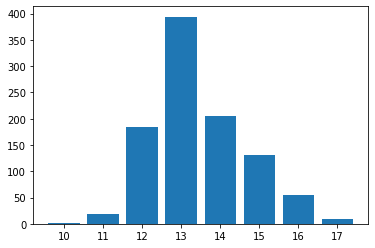

In [32]:
plt.bar(range(10,18),proj_df['Project'].groupby(proj_df['Project']).count())

In the graph above, we combine the distribution and the sample statistics of the project completion dates over the 1,000 replications (output of the next cell). We can see that the simulated project completion times are right-skewed; that is, the worst case scenario is further away from the median than the best case scenario. In order to have a 95% chance of meeting the deadline, the quote should actually be around 15 days, as calculated below.

In [29]:
print(proj_df['Project'].describe())

count    1000.000000
mean       13.446000
std         1.206872
min        10.000000
25%        13.000000
50%        13.000000
75%        14.000000
max        17.000000
Name: Project, dtype: float64


In [10]:
print(np.percentile(proj_record,95))

16.0


## Scenario Two: Parallel Tasks

---

Now, we have received new information that Tasks 2 and 3 can actually be conducted at the same time. 

![Parallel Tasks](images/p03_02.png)

With this update, the project completion time is now dependent on the task that gets completed later: `proj_time = t1_time + max(t2_time, t3_time)`. Therefore, we slightly modify our simulation to the following:

In [35]:
reps = 1000

t1_record = []
t2_record = []
t3_record = []

proj_record = []

t1_comp = [3, 2, 4]
t1_prob = [0.7, 0.1, 0.2]

t2_comp = [6, 5, 8]
t2_prob = [0.6, 0.2, 0.2]

t3_comp = [4, 3, 5]
t3_prob = [0.8, 0.05, 0.15]

for i in range(reps):
    t1_time = np.random.choice(t1_comp, 1, p=t1_prob)[0]
    t2_time = np.random.choice(t2_comp, 1, p=t2_prob)[0]
    t3_time = np.random.choice(t3_comp, 1, p=t3_prob)[0]
    
    proj_time = t1_time + max(t2_time, t3_time) #note the change here
    
    t1_record.append(t1_time)
    t2_record.append(t2_time)
    t3_record.append(t3_time)
    
    proj_record.append(proj_time)
    
proj_df = pd.DataFrame({"Task_1": t1_record,
                        "Task_2": t2_record, 
                        "Task_3": t3_record, 
                        "Project": proj_record})

print(proj_df.head())

   Task_1  Task_2  Task_3  Project
0       3       5       4        8
1       3       6       4        9
2       3       6       4        9
3       3       6       4        9
4       3       8       4       11


<BarContainer object of 6 artists>

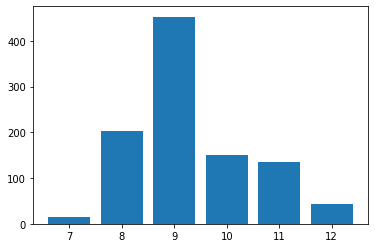

In [58]:
plt.bar(range(min(proj_record),max(proj_record)+1),proj_df['Project'].groupby(proj_df['Project']).count())

In [59]:
print(np.percentile(proj_record,95))

11.0

## Scenario Three: Correlated Task Risks

---

When we see "correlated tasks", we probably first think of correlation of coefficients. However, the number of correlation coefficients increases exponentially as the number of tasks increases, just like the possible combination of tasks (you can learn more about [combinations](https://www.khanacademy.org/math/precalculus/x9e81a4f98389efdf:prob-comb/x9e81a4f98389efdf:combinations/v/combination-formula) and [permutations](https://www.khanacademy.org/math/precalculus/x9e81a4f98389efdf:prob-comb/x9e81a4f98389efdf:combinatorics-precalc/v/permutation-formula) on Khan Academy), not to mention the amount of work that has to go into deciding the relationships between those tasks. At the same time, correlation coefficients are mathematical concepts which do not carry the most meaningful real-world interpretations, especially when a project manager tries to understand why the correlation in risks exists or how it could be managed. Therefore, more frequently, we would specify a risk event that could potentially impact multiple tasks and the probability of that risk event; we could also specify a risk factor, which would again affect multiple tasks. For now, let's go back to the assumption that the three tasks are sequential, as in Scenario One.

![Sequential Tasks](images/p03_01.png)


In this scenario, the weather would have an impact on all three tasks, while internal communication would affect only Tasks 2 and 3. Let's say that there is a 40% chance of bad weather, in which case the project is going to be delayed for 2 days. On the other hand, the communication factor varies in a way that is similar to a normal distribution, with a mean of 1 and a standard deviation of 0.1. When the communication between team members is efficient, the communication factor is smaller than 1 and reduces the project completion time; otherwise it is larger than 1 and increases the completion time. By modeling the probability of risk events and factors, we arrive at the following equation:

\begin{equation}
\begin{split}
& Project\:Completion\:Time\\
=\: & 2 \cdot Weather + Task_{1}\:Completion\:Time + Communication\:Factor \cdot (Task_{2}\:Completion\:Time + Task_{3}\:Completion\:Time)
\end{split}
\end{equation}

In our case, since the weather is a binary event, while the communication factor is normally distributed, we define them as the following:

In [37]:
weather = np.random.binomial(1, 0.4) # the arguments are 'number of trials' and 'probability of success'respectively
communication = np.random.normal(1, 0.1)  # note that this is technically an indefinite float so rounding is needed

print(weather)
print(communication)

1
0.9500478663155578


We can then modify our simulation, as such:

In [40]:
reps = 1000

weather_record = [] # recording the events
communication_record = []

t1_record = []
t2_record = []
t3_record = []

proj_record = []

t1_comp = [3, 2, 4]
t1_prob = [0.7, 0.1, 0.2]

t2_comp = [6, 5, 8]
t2_prob = [0.6, 0.2, 0.2]

t3_comp = [4, 3, 5]
t3_prob = [0.8, 0.05, 0.15]

for i in range(reps):
    weather = np.random.binomial(1, 0.4) # simulate the events
    communication = round(np.random.normal(1, 0.1),2)
    
    t1_time = np.random.choice(t1_comp, 1, p=t1_prob)[0]
    t2_time = np.random.choice(t2_comp, 1, p=t2_prob)[0]
    t3_time = np.random.choice(t3_comp, 1, p=t3_prob)[0]
    
    proj_time = 2 * weather + t1_time + communication * max(t2_time, t3_time) # note the changes in calculation
    
    weather_record.append(weather)
    communication_record.append(communication)
    
    t1_record.append(t1_time)
    t2_record.append(t2_time)
    t3_record.append(t3_time)
    
    proj_record.append(proj_time)
    
proj_df = pd.DataFrame({"Weather": weather_record,
                        "Communication": communication_record,
                        "Task_1": t1_record,
                        "Task_2": t2_record, 
                        "Task_3": t3_record, 
                        "Project": proj_record})

print(proj_df.head())

   Weather  Communication  Task_1  Task_2  Task_3  Project
0        1           1.03       3       5       4    10.15
1        0           0.90       3       6       4     8.40
2        0           0.90       2       8       4     9.20
3        0           1.12       2       6       5     8.72
4        1           1.14       3       6       4    11.84


(array([ 10.,  80., 186., 206., 179., 171.,  97.,  48.,  18.,   5.]),
 array([ 6.15 ,  7.079,  8.008,  8.937,  9.866, 10.795, 11.724, 12.653,
        13.582, 14.511, 15.44 ]),
 <a list of 10 Patch objects>)

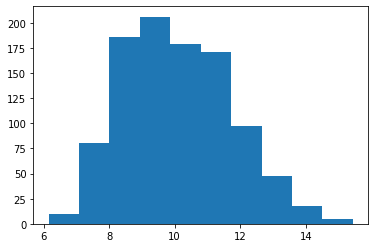

In [42]:
plt.hist(proj_df['Project']) # note how the distribution is continuous now and not discrete anymore

In [43]:
print(np.percentile(proj_record,95))

13.08


## References

---

https://risk-engineering.org/notebook/monte-carlo-project-risk.html <br>
https://www.vosesoftware.com/riskwiki/Correlationwithprojectscheduleriskanalysis.php